In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import layers, callbacks

In [ ]:
df = pd.read_csv("final_merged.csv")
# Define the ordered categories (assuming months are numbers 1 to 12)
month_categories = list(range(1, 13))

# Convert the 'month' column to an ordered categorical type without renaming
df['month'] = pd.Categorical(df['month'], categories=month_categories, ordered=True)
# Convert percentage columns to numerical values
df['Percentage of Federal Land'] = df['Percentage of Federal Land'].str.rstrip('%').astype(float)

# Select features and target variable
features = ['month', 'PRCP', 'EVAP', 'TMIN', 'TMAX', 'mean_elevation',
            'Land Area (sq mi)', 'Water Area (sq mi)', 'Total Area (sq mi)',
            'Percentage of Federal Land', 'Urbanization Rate (%)']

target = 'total_fire_size'

X = df[features]
y = df[target]

# Split the dataset into 90% training and 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training set shape: (5924, 11) (5924,)
Test set shape: (659, 11) (659,)


In [8]:
X_train[0]

array([-0.65682319, -0.53166247,  0.32718297, -0.13829795,  0.46189658,
       -0.85436908, -0.40321255, -0.29130358, -0.40373946, -0.59105189,
       -1.21931303])

In [17]:
X

,month,PRCP,EVAP,TMIN,TMAX,mean_elevation,Land Area (sq mi),Water Area (sq mi),Total Area (sq mi),Percentage of Federal Land,Urbanization Rate (%)
0,5,5.36,44.17,-56.0,233.0,580,570641,94743,665384,60.9,64.9
1,6,14.03,39.27,-17.0,322.0,580,570641,94743,665384,60.9,64.9
2,7,16.78,30.91,28.0,300.0,580,570641,94743,665384,60.9,64.9
3,8,10.46,20.14,-33.0,267.0,580,570641,94743,665384,60.9,64.9
4,9,17.25,15.27,-61.0,183.0,580,570641,94743,665384,60.9,64.9
...,...,...,...,...,...,...,...,...,...,...,...
6578,5,2.68,64.76,-22.0,311.0,2040,97093,720,97813,46.7,62.0
6579,6,24.68,64.64,-22.0,333.0,2040,97093,720,97813,46.7,62.0
6580,7,5.93,83.97,-11.0,378.0,2040,97093,720,97813,46.7,62.0
6581,8,9.55,71.71,22.0,356.0,2040,97093,720,97813,46.7,62.0


In [ ]:
len(X_train[0])

11

In [10]:
y_train

3365    1700.270
501      313.900
3908     327.000
2091       1.700
2754     238.190
          ...   
3772      24.300
5191    1145.772
5226      25.000
5390    2729.400
860     3543.150
Name: total_fire_size, Length: 5924, dtype: float64

In [12]:
df = X.copy()
df['total_fire_size'] = y

# Compute the correlation matrix
corr_matrix = df.corr()

# Extract correlation between total_fire_size and each feature
y_corr = corr_matrix['total_fire_size'].drop('total_fire_size')

print(y_corr)

month                        -0.013289
PRCP                         -0.115773
EVAP                          0.109793
TMIN                         -0.002862
TMAX                          0.101767
mean_elevation                0.091965
Land Area (sq mi)             0.281245
Water Area (sq mi)            0.248905
Total Area (sq mi)            0.287827
Percentage of Federal Land    0.190110
Urbanization Rate (%)         0.028945
Name: total_fire_size, dtype: float64


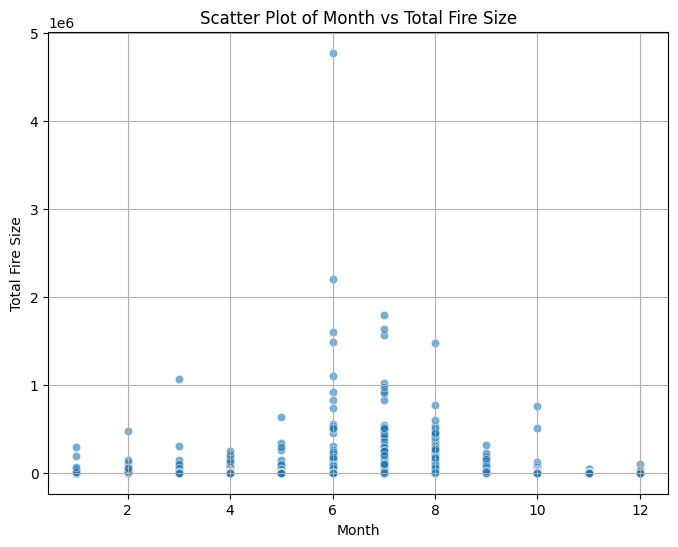

In [18]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['month'], df['total_fire_size'], alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Scatter Plot of Month vs Total Fire Size')
plt.xlabel('Month')
plt.ylabel('Total Fire Size')
plt.grid(True)
plt.show()